<a href="https://colab.research.google.com/github/gitlakshya/Assignments/blob/Ques3/ML/G24AIT2002_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q3**: SVM - 15 marks
Use the dataset “Bank_Personal_Loan_Modelling.csv”
1. Store the dataset in your google drive and in Colab file load the dataset from your drive.
2. Check the shape and head of the dataset.
3. Age, Experience, Income, CCAvg, Mortgage, Securities are the features and Credit Card
is your Target Variable.
-  Take any 3 features from the six features given above
-  Store features and targets into a separate variable
-  Look for missing values in the data, if any, and address them accordingly.
- Plot a 3D scatter plot using Matplotlib.
4. Split the dataset into 80:20. (3 features and 1 target variable).
5. Train the model using scikit learn SVM API (LinearSVC) by setting the regularization
parameter C as C = {0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000}.
- For each value of C Print the score on test data
- Make the prediction on test data
- Print confusion matrix and classification report
6. Use gridSearchCV a cross-validation technique to find the best regularization
parameters (i.e.: the best value of C).
In the report provide your findings for the output generated for all the kernels used and also
describe the changes that happened after changing the regularization hyperparameter.


In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# Storing the dataset in google drive and loading the dataset from drive

In [2]:
# 1. Store the dataset in your google drive and in Colab file load the dataset from your drive.
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv('/content/drive/MyDrive/Assignments/ML/Bank_Personal_Loan_Modelling.csv')
bank_df = pd.DataFrame(dataset)

Mounted at /content/drive


# Check for shape and head of the dataset

In [3]:
# 2. Check the shape and head of the dataset.

rows_count, columns_count = bank_df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)
bank_df.head()

Total Number of rows : 5000
Total Number of columns : 14


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Preprocessing Steps

### Age, Experience, Income, CCAvg, Mortgage, Securities are the features and Credit Card is your Target Variable.
- Take any 3 features from the six features given above
- Store features and targets into a separate variable
- Look for missing values in the data, if any, and address them accordingly.
- Plot a 3D scatter plot using Matplotlib.

In [4]:
# For selecting features we first check the data

bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- In this we can see that the minimum experience is -3, which can not be the case as experience can not be negative. So we'll be fixing this in data cleaning

**For Starting We're selecting Experience, Income & CCAVG as the features because:**

- Experience - It gives the insight about how fincancially stable a person is, so considering Experience can be helpful factor
- Income - It is a primary factor for checking the ability of a person to have a credit card or not
- CCAVG - As it can give insights about the customer's spending behavior

In [12]:
# Selecting features
selected_features = bank_df[['Experience', 'Income', 'CCAvg']]

In [13]:
# Storing feature and target into separate variable
X = selected_features
y = bank_df['CreditCard']

In [14]:
# Look for missing values in the data, if any, and address them accordingly.
print("Sum of null or missing values in features: ", X.isna().sum())
print("Sum of null or missing values in target variable: ", y.isna().sum())

Sum of null or missing values in features:  Experience    0
Income        0
CCAvg         0
dtype: int64
Sum of null or missing values in target variable:  0


There are no null or missing values but we know that there are negative values in experience. So, we should fix those values

In [15]:
# Check what all negative values Experience column has

selected_features[selected_features['Experience'] < 0] ['Experience'].value_counts()

,count
Experience,


In [16]:
# total count of Negative values in Experience column
selected_features[selected_features['Experience'] < 0] ['Experience'].count()

0

In [11]:
# Imputing negative values, using relative features for better imputation

df_Positive_Experience = bank_df[bank_df['Experience'] >= 0]
df_Negative_Experience = bank_df[bank_df['Experience'] < 0]

# Create a dictionary to store pre-calculated medians
median_experience_cache = {}

# Function to calculate median experience based on filters
def calculate_median_experience(age, education, df_filter,positive=True):
    key = (age, education,positive)
    if key in median_experience_cache:
        return median_experience_cache[key]

    filtered_df = df_filter[(df_filter['Age'] == age) & (df_filter['Education'] == education)]

    if not filtered_df.empty:
        median_exp = filtered_df['Experience'].median()
    else:
        median_exp = None
    median_experience_cache[key] = median_exp
    return median_exp


# Iterate through negative experience rows and impute values
for index, row in df_Negative_Experience.iterrows():
    age_values = row["Age"]
    education_values = row["Education"]

    exp = calculate_median_experience(age_values, education_values, df_Positive_Experience)

    if exp is None:
        exp = calculate_median_experience(age_values, education_values, df_Negative_Experience,positive=False)

    #If not found in both then impute with median of all positive experience
    if exp is None:
        exp = df_Positive_Experience['Experience'].median()

    # Impute the value in the original DataFrame
    bank_df.loc[index, 'Experience'] = abs(round(exp))

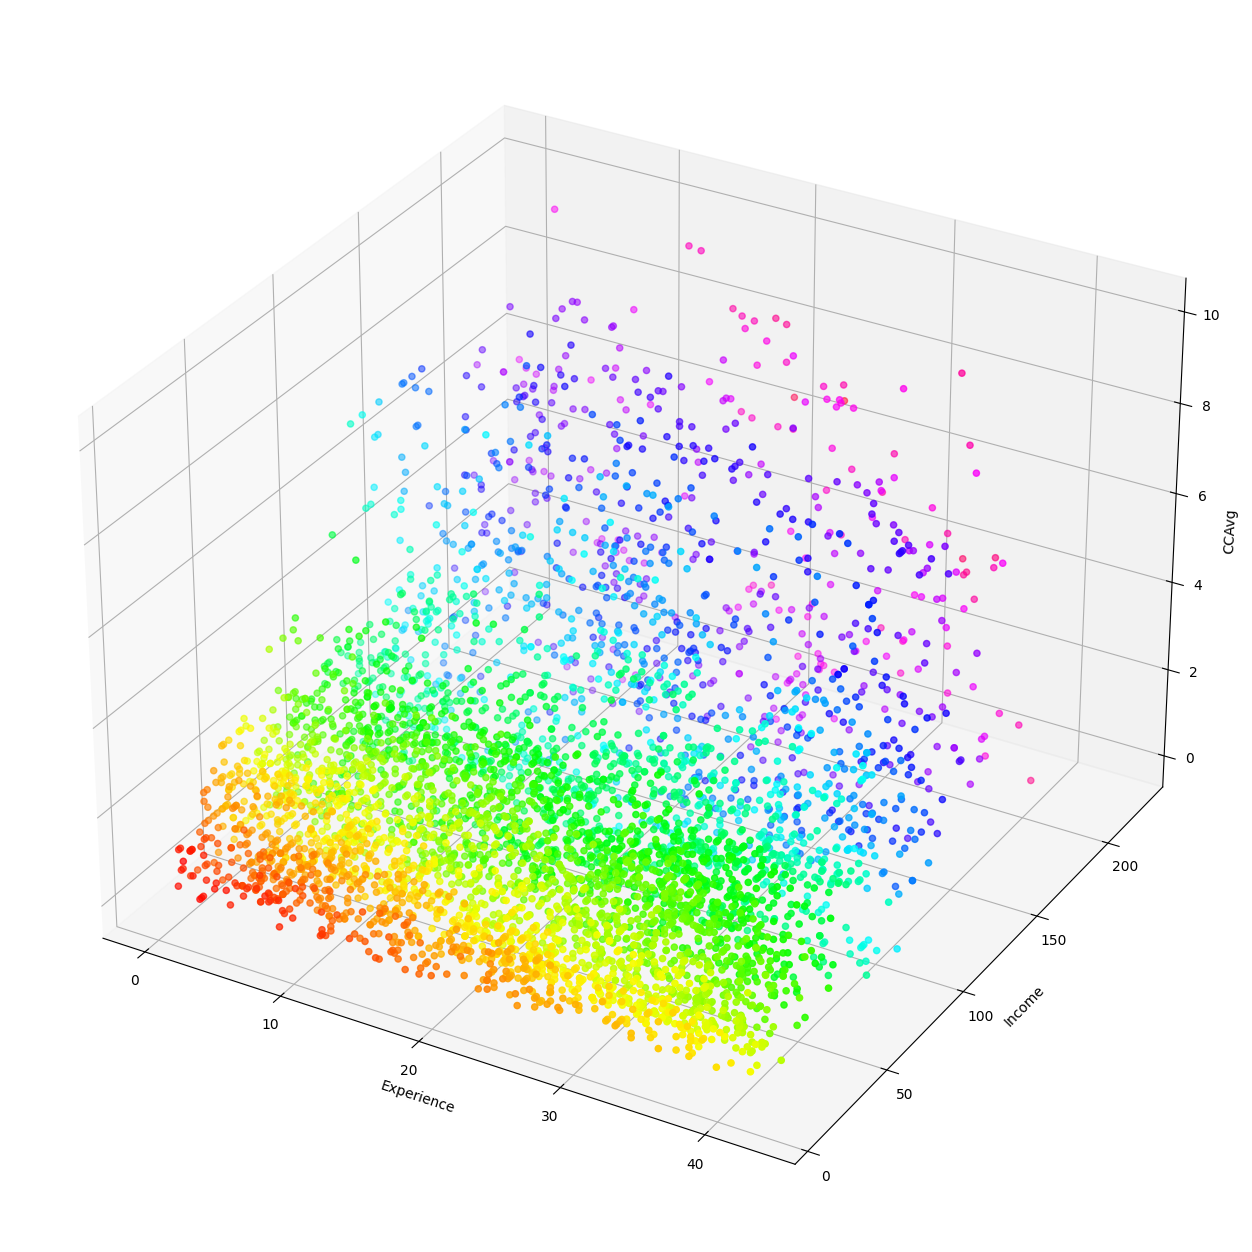

In [23]:
# Now plotting a 3D scatter plot using matplot lib
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(20, 16))
ax = plt.axes(projection='3d')

my_cmap = plt.get_cmap('hsv')
ax.scatter3D(X['Experience'], X['Income'], X['CCAvg'], c= (X['Experience']+X['Income']+X['CCAvg']) ,cmap=my_cmap,)
ax.set_xlabel('Experience')
ax.set_ylabel('Income')
ax.set_zlabel('CCAvg')

plt.show()

# 4. Split the dataset into 80:20. (3 features and 1 target variable).


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data set into 80:20 ration of training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)